## HW3 - Differential Gene Expression in Acute Myocardial Infraction

### IDs:
Insert yours IDs to the cell below

ID #1: 315535351

ID #2: 205789167

ID #3: 314982729


In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata, ttest_ind, ranksums

First, we'll load the dataset and observe it, before starting the pre-process stage.

In [16]:
# Direct download link for the Google Drive file
data_link = r'https://drive.google.com/uc?id=1LWyWPyqvagFxdiCpSWatR7qGFnGrEdGA'
original_df = pd.read_csv(data_link, encoding='ISO-8859-1', header=None)

C:\Users\shell\AppData\Local\Temp\ipykernel_32228\3210676312.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv(data_link, encoding='ISO-8859-1', header=None)


In [17]:
original_df.head(75)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,"!Series_title\t""A Whole Blood Molecular Signat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"!Series_geo_accession\t""GSE66360""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"!Series_status\t""Public on Feb 28 2015""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"!Series_submission_date\t""Feb 27 2015""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"!Series_last_update_date\t""Dec 27 2017""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1431_at,7.270560667,4.810194735,7.822844272,5.690417407,7.089369391,8.318673338,6.701539441,7.961931645,7.741580193,...,5.186293592,5.228164837,4.71736309,4.122589664,6.513464026,6.133231971,3.89680742,5.545193595,4.14747677,4.693670402
71,1438_at,5.02150863,5.202282497,5.283354784,5.38825026,5.30440749,5.175463008,5.283783348,5.414215104,5.563807242,...,5.498879802,5.349688643,5.835987661,5.147872523,5.932479243,6.167461177,5.571783155,5.622806824,5.583193365,6.006759558
72,1487_at,8.059842362,7.634543232,7.783020434,7.569898592,7.740858382,8.184451393,7.458817913,8.012166124,8.005788666,...,7.574632251,7.657456955,5.969790048,6.597012488,7.19167683,5.942288991,6.728296485,7.292620893,7.54916559,7.876769784
73,1494_f_at,4.465542158,5.10905881,4.443265984,4.2337,4.809292562,4.437840907,4.440681147,4.570134669,4.471556875,...,4.863268281,4.514369491,6.022788382,4.73807987,4.618616637,5.478472244,5.356384048,4.904144868,4.569553861,5.443059051


When looking at the csv file, we can notice that the data actually starts only at the 60th row. However, the 59th row that is classified as 'Class', is actually the label of each observation - H/M, which means that in our dataframe every column is a sample/patient, and every row is a different gene. We would like to change that so that the first 58 columns are dropped, and then transpose the df so that the rows and columns are switched.

In [18]:
df = (original_df.drop(original_df.index[:59]).reset_index(drop=True).T)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,54667,54668,54669,54670,54671,54672,54673,54674,54675,54676
0,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.257325,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649
6,H,GSM1620824,5.116153518,7.203591859,6.43522914,6.28542026,2.70668403,9.538661422,7.43717345,5.408639388,...,13.27999,13.318979,14.559615,14.271351,4.731282,3.043079,2.817982,2.52161,3.51609,3.774956
7,H,GSM1620825,5.431328058,7.694550756,6.320546126,6.562315839,2.674746672,9.837551637,7.127690377,5.111689416,...,13.374495,13.472778,14.520451,14.250759,4.531371,3.231108,2.52506,2.840601,3.514949,3.526497
8,H,GSM1620826,5.235270857,7.760259212,6.48359047,6.345887555,2.635149735,10.11188891,8.214922404,5.61726259,...,13.428778,13.425372,14.579482,14.325664,4.318541,3.304716,2.917278,2.509774,3.475952,3.626839
9,H,GSM1620827,5.773528455,8.279814404,6.387779205,6.27280582,2.696649177,9.629918501,7.415155953,5.317689635,...,13.290415,13.346196,14.596206,14.289393,4.43224,3.384011,2.643849,2.69682,3.495199,3.599542


Now we can see that the first row is in fact the column names, so we'll modify the df's header and remove the first row.

In [19]:
df.columns = df.iloc[0]
df = df[1:]
df.head(10)

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.257325,13.266235,14.57123,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.53997,3.698396
4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.50663,2.609707,3.43472,3.577649
6,H,GSM1620824,5.116153518,7.203591859,6.43522914,6.28542026,2.70668403,9.538661422,7.43717345,5.408639388,...,13.27999,13.318979,14.559615,14.271351,4.731282,3.043079,2.817982,2.52161,3.51609,3.774956
7,H,GSM1620825,5.431328058,7.694550756,6.320546126,6.562315839,2.674746672,9.837551637,7.127690377,5.111689416,...,13.374495,13.472778,14.520451,14.250759,4.531371,3.231108,2.52506,2.840601,3.514949,3.526497
8,H,GSM1620826,5.235270857,7.760259212,6.48359047,6.345887555,2.635149735,10.11188891,8.214922404,5.61726259,...,13.428778,13.425372,14.579482,14.325664,4.318541,3.304716,2.917278,2.509774,3.475952,3.626839
9,H,GSM1620827,5.773528455,8.279814404,6.387779205,6.27280582,2.696649177,9.629918501,7.415155953,5.317689635,...,13.290415,13.346196,14.596206,14.289393,4.43224,3.384011,2.643849,2.69682,3.495199,3.599542
10,H,GSM1620828,6.016415473,7.580840863,6.307065808,5.971847425,2.802862883,9.163517217,6.822991034,5.527330066,...,13.278438,13.263749,14.557877,14.241072,4.782958,3.139504,2.787684,2.79354,3.580411,3.67438


### **3. Analysis**

#### a. High level description of the data and some pre-processing

#### **1) How many genes profiled?**

After our previous pre-processing, we know that the different genes are represented by the number of columns minus 2, since we need to remove the 'Class' and 'ID_REF' columns. Therefore, the number of genes profiled is 54,675.

In [20]:
num_genes_profiled = df.shape[1] - 2
num_genes_profiled

54675

#### **2) How many samples (subjects/patients) in total?**

Like in the previous question, after the pre-processing the number of samples/patients is represented by the number of rows, which is 99.

In [21]:
num_patients = df.shape[0]
num_patients

99

#### **3) How many samples in each class?**

The dataset contains 50 healthy patients with class H and 49 patients with Myocardial Infraction with class M.

In [22]:
patients_per_class = df['Class'].value_counts()
patients_per_class

Class
H    50
M    49
Name: count, dtype: int64

#### **4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?**


Since we transposed the df the genes now correspond to the columns, meaning that we will now drop columns that contain NaN:

In [23]:
df = df.dropna(how='any', axis=1)
df.shape[1]

54630

We can see that now the df contains 54,630 columns, and if we will subtract 2 we will find that there are now 54,628 genes.

#### **5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H**

In [24]:
np.random.seed(42)

num_genes = 20
genes = df.drop(['Class', 'ID_REF'], axis=1)
random_genes = np.random.choice(genes.columns, num_genes, replace=False)

random_genes_df = df[['Class'] + list(random_genes)]

# melt the dataframe so it'd be easier to plot
random_genes_df = random_genes_df.melt(id_vars='Class', var_name='Gene', value_name='Expression')
random_genes_df['Expression'] = pd.to_numeric(random_genes_df['Expression'])

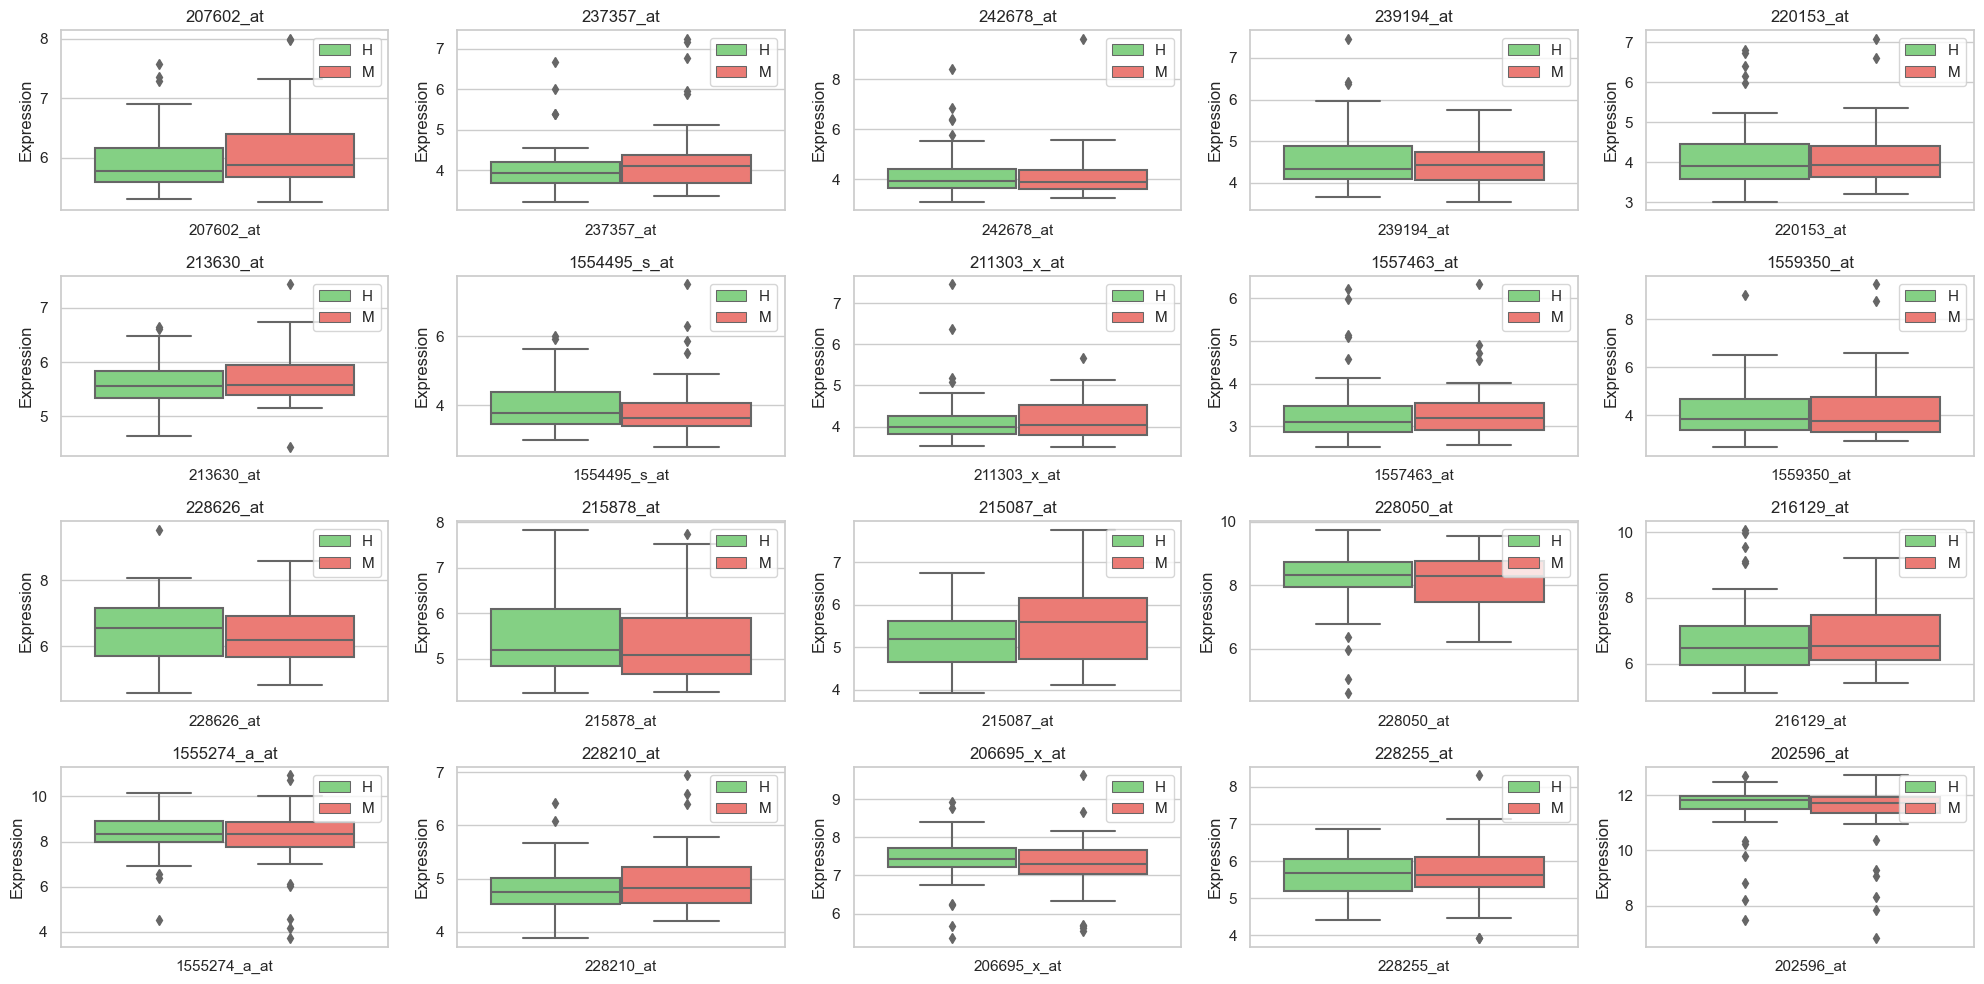

In [25]:
# plot the different boxplots pairs
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
for i, gene in enumerate(random_genes):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x='Gene', y='Expression', hue='Class', data=random_genes_df[random_genes_df['Gene'] == gene],
                palette={'H': '#77dd77', 'M': '#ff6961'})
    plt.title(gene)
    plt.xlabel('')  # remove x label
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### **b. WRS for differential expression (DE)**

#### **1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g's expression levels measured for samples labeled M?**

Under the null hypothesis, which assumes no difference in distribution between the two groups, every sample from both groups has an equal chance of getting any rank when all samples are ranked together.

The expected rank for any sample is then the average of all ranks, which is $$\frac{N+1}{2}$$ (where N is the total number of samples across both groups).

Then, the expected sum of ranks for the M group is this average rank multiplied by the number of samples. From this we get that $$\mu_T = \frac{B(N+1)}{2}$$ 
Where B is the number of patients with class M (49, as calculated in question 3a), and N is the total number of patients (99, as calculated in question 2a).

Therefore, we get the following:
$$\mu_T = \frac{B(N+1)}{2} = \frac{49 \cdot 100}{2} = 2450$$

#### **2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?**

$RS(g)$ is the sum of ranks for the samples from the M group for a specific gene g. Since ranks are a series of integers from 1 to N, the maximum sum of ranks would be when all of the 49 M labeled samples are at the bottom of the table where they receive the highest possible ranks. This can be calculated by summing the ranks from $N-M+1$ to $N$, $$\Sigma_{i=N-M+1}^Ni=\Sigma_{i=51}^{99}i=3675$$

In [26]:
sum(range(51, 100))

3675

#### **3) Under the null model, what is the probability of $RS(g) = c$  ? (Provide formula for this and explain it)**

Since c is the max value RS(g) can take, and as we explained in the previous question that it can only happen when the 49 M labeled samples are positioned at the bottom of the table, and there are ${N \choose B}={99 \choose 49}$ ways to position them there. Therefore, we get that:
$$ P(RS(g)=c) = \frac{1}{N \choose B} = \frac{1}{99 \choose 49} $$

#### **4) Under the null model, what is the probability of $RS(g) = c-1$  ? what is the probability of $RS(g) = c-2$  ? (Provide formulas and explain them)**

We've shown that the only way to get $c=3675$ is by positioning the $B=49$ M labeled samples at the bottom of the table at positions $[51,...,99]$.

In order to get a sum of $c-1=3674$, we need to replace the position of one of the ranks $r$ in $[51,...,99]$ to be $r-1$. The only possible way to do that is by replacing $r=51$ to $r-1=50$, which will result in our set of 49 M labeled samples to be positioned at $[50, 52, ... , 98, 99]$.

Since there's only one possibility to choose the set above, we get that:
$$ P(RS(g)=c-1)=\frac{1}{99 \choose 49} $$

Now, in order to get a sum of $c-2=3673$, we need to lower one of the ranks $r$ in $[51,...,99]$ to be $r-2$. To do that, we have 2 options:


*   Replace $r=51$ with $r-2=49$, which results in the set $[49, 52, ..., 98, 99]$
*   replace $r=52$ with $r-2=50$, which results in the set $[50, 51, 53, ..., 98, 99]$

In conclusion, for $c-2$ we have two possible combinations for choosing the positions for our set of 49 M labeled samples, and thus we get:
$$ P(RS(g) = c-2) = \frac{2}{99 \choose 49} $$



#### **5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.**

In [27]:
# create the ranks df and get the sum of ranks for each gene
ranks = df.drop(['Class', 'ID_REF'], axis=1).apply(lambda x: rankdata(x, method='average'), axis=0)
sum_ranks_M = ranks[df['Class'] == 'M'].sum()
sum_ranks_M.head(10)

0
1007_s_at    2304.0
1053_at      2604.0
117_at       2963.0
121_at       2540.0
1255_g_at    2598.0
1294_at      2308.0
1316_at      2010.0
1320_at      2691.0
1405_i_at    2697.0
1431_at      1924.0
dtype: float64

In [28]:
# extract the values from the sum_ranks above for the histogram
hist_data = sum_ranks_M.values
# calculate the iqr
q1, q3 = int(np.percentile(hist_data, 25)), int(np.percentile(hist_data, 75))
iqr = q3 - q1
print(f"The value of the IQR is {iqr} and it's between Q1={q1} and Q3={q3}")

The value of the IQR is 328 and it's between Q1=2297 and Q3=2625


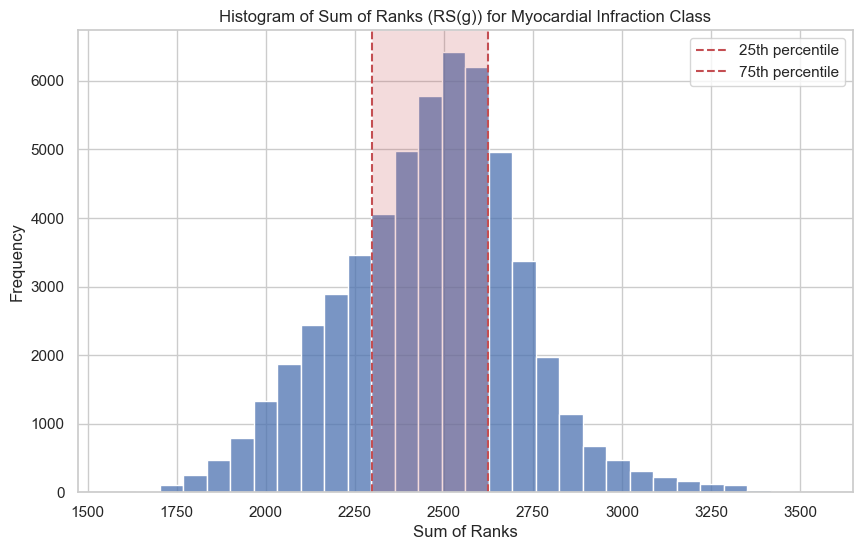

In [29]:
# plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(hist_data, bins=30)

plt.axvline(q1, color='r', linestyle='--', label='25th percentile')
plt.axvline(q3, color='r', linestyle='--', label='75th percentile')
plt.axvspan(q1, q3, facecolor='r', alpha=0.2)

plt.title('Histogram of Sum of Ranks (RS(g)) for Myocardial Infraction Class')
plt.xlabel('Sum of Ranks')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### **c. Differential Expression**

To identify genes that are significantly overexpressed or underexpressed in condition M compared to condition H, we will conduct one-sided statistical tests with a significance threshold set at a p-value of 0.07. 

We will perform two separate analyses—one to detect overexpression (where the mean expression in M is hypothesized to be greater than in H) and another for underexpression (where the mean expression in M is hypothesized to be less than in H). 

**Student t-test**

In [30]:
healthy_index = (df['Class']=='H')
disease_index = (df['Class']=='M')

df_healthy = df.iloc[:,2:][healthy_index].astype('float')
df_myocardial = df.iloc[:,2:][disease_index].astype('float')

In [31]:
p_values_t_greater = ttest_ind(df_myocardial, df_healthy, alternative='greater')[1]
p_values_t_less = ttest_ind(df_myocardial, df_healthy, alternative='less')[1]


In [32]:
overexpressed_t_count = (p_values_t_greater<0.07).sum()
underexpressed_t_count = (p_values_t_less<0.07).sum()

In [33]:
print(f"For the t-test the number of genes overexpress in M vs H: {overexpressed_t_count}\nFor the t-test the number of genes underexpressed in M vs H: {underexpressed_t_count}")

For the t-test the number of genes overexpress in M vs H: 8517
For the t-test the number of genes underexpressed in M vs H: 8639


**Wilcoxon rank-sum tests**

In [34]:
from scipy.stats import mannwhitneyu

In [35]:
p_values_u_greater = mannwhitneyu(df_myocardial, df_healthy, alternative='greater')[1]
p_values_u_less = mannwhitneyu(df_myocardial, df_healthy, alternative='less')[1]

In [36]:
overexpressed_u_count = (p_values_u_greater < 0.07).sum()
underexpressed_u_count = (p_values_u_less < 0.07).sum()

array([False, False,  True, ..., False, False, False])

In [37]:
print(f"For the Wilcoxon rank-sum the number of genes overexpress in M vs H: {overexpressed_u_count}\nFor the Wilcoxon rank-sum the number of genes underexpressed in M vs H: {underexpressed_u_count}")

For the Wilcoxon rank-sum the number of genes overexpress in M vs H: 10721
For the Wilcoxon rank-sum the number of genes underexpressed in M vs H: 10618


### **d. Correlations**

From each of the Wilcoxon rank-sum tests we ran above, we selected the top 80 genes and concatenated them into one Dataframe.

In [38]:
sorted_indices_greater = np.argsort(p_values_u_greater)[:80]
top_80_genes_greater = df.columns[2:][sorted_indices_greater]
df_top_80_genes_greater = df[top_80_genes_greater]

In [39]:
sorted_indices_less = np.argsort(p_values_u_less)[:80]
top_80_genes_less = df.columns[2:][sorted_indices_less]
df_top_80_genes_less = df[top_80_genes_less]

In [40]:
D = pd.concat([df_top_80_genes_greater, df_top_80_genes_less], axis = 1)
D = D.astype('float')

#### **1)	Compute Spearman 𝜌 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap.**

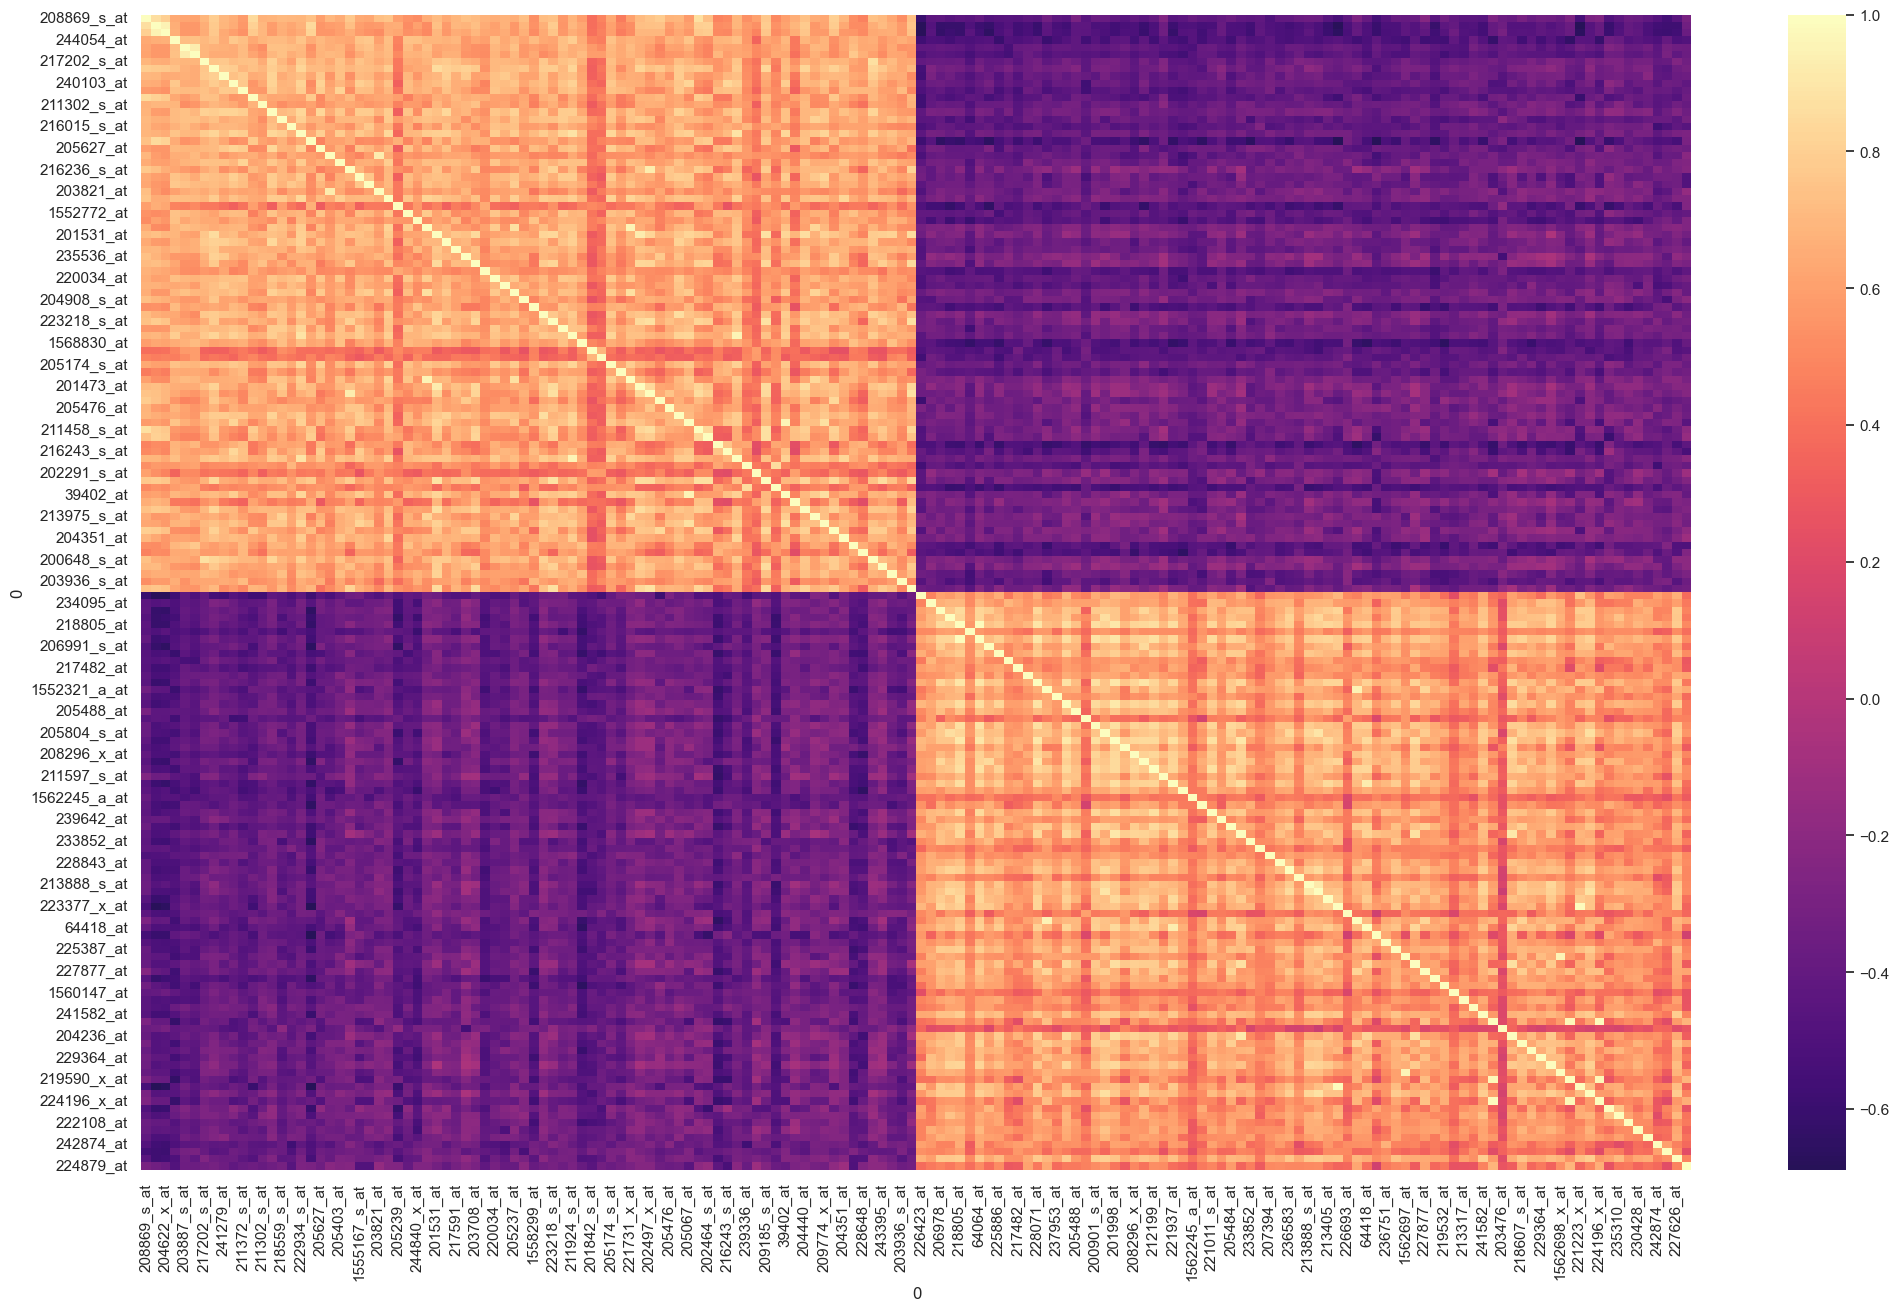

In [41]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(D.corr(method='spearman'), center=0, cmap='magma')
plt.show()

#### **2)	Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜌?**

 Under a NULL model that assumes that genes are pairwise independent, we would expect the expected value for 𝜌 to be approximately zero

#### 3)	Now compute the Spearman 𝜌 correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.

In [42]:
D_over = df[top_80_genes_greater].astype('float')

In [43]:
spearman_corr_matrix = D_over.corr(method = 'spearman')

In [44]:
unique_corr_values = spearman_corr_matrix.where(np.triu(np.ones(spearman_corr_matrix.shape), k=1).astype(bool)).stack()

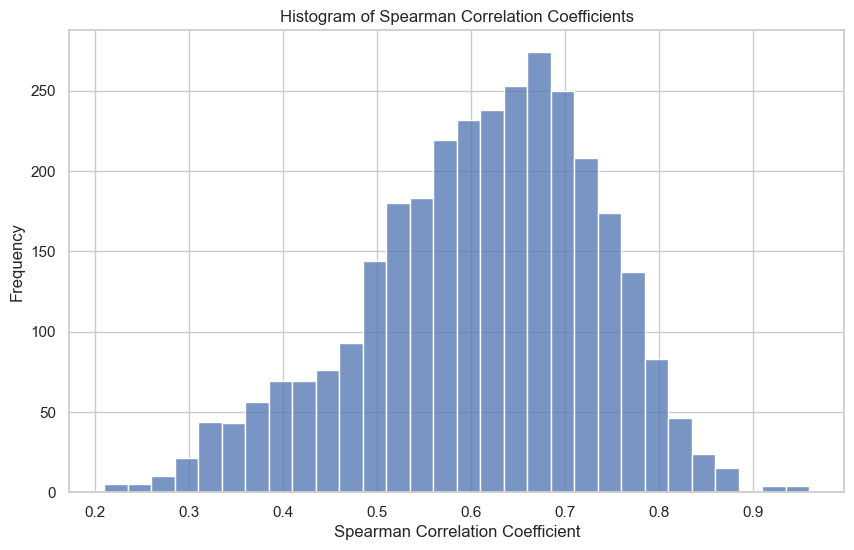

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(unique_corr_values, bins=30, kde=False)
plt.title('Histogram of Spearman Correlation Coefficients')
plt.xlabel('Spearman Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()

In [46]:
average_corr_value = unique_corr_values.mean()
print(f'The average Spearman correlation coefficient is: {average_corr_value:.3f}')

The average Spearman correlation coefficient is: 0.610


The average Spearman correlation coefficient is reported to be approximately 0.610. This average value suggests that, on average, gene pairs tend to show a positive correlation in their expression levels, meaning that as the expression of one gene increases, the expression of the other gene tends to increase as well across the samples in the dataset.

In summary, the results suggest that the overexpressed genes in D have a tendency to be co-expressed, which might imply biological significance.

#### **4)	What can you report about co-expression of genes in D (co-expression is inferred from the correlation of the expression levels of genes, across a set of samples)?**

In [47]:
from scipy.stats import spearmanr

In [48]:
# Calculate the Spearman correlation matrix for D
D_corr = D.corr(method='spearman')

Calculates the P-VALUE of Spearman Corr for D

In [49]:
def spearman_p_value(x,y):
        return spearmanr(x,y)[1]

In [50]:
D_corr = D.corr(method='spearman')
D_corr_p_value = D.corr(method=spearman_p_value)

By using both the correlation and the P-value, we can detect only significant correlations across the diffrent genes.

We will count all the correlations which their P-value where less than 0.05 and their (abs) correction is bigger then 0.5.

In [51]:
strog_D_corr = ((D_corr_p_value < 0.05) & (abs(D_corr) >= 0.5))

In [52]:
# Excluding the correlation of the Gene with itself
num_strog_D_corr = strog_D_corr.where(np.triu(np.ones(strog_D_corr.shape), k=1).astype(bool)).stack().sum()

In [93]:
print(f"The number of significant co-expression genes is: {int(num_strog_D_corr)}")

The number of significant co-expression genes is: 5474


#### **5)	What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? Explain your answer.**

In our complete dataset, we have a total of 1,492,081,878 unique gene pairs from 54,628 genes. 

Assuming a FDR threshold of 0.05 for the null hypothesis, we would expect about 5% of these gene pairs to be falsely identified as significantly co-expressed. This translates to approximately 74,604,094 gene pairs exhibiting a p-value that is erroneously considered significant (less than the threshold of 0.05) by chance alone.

However, within our specific subsets of overexpressed and underexpressed genes, we observe a number of gene pairs that exhibit significant co-expression—meaning their p-values are lower than would be expected by their ranking within the entire list of p-value comparisons. As a result, when we apply an FDR of 0.05 to our data, we expect to find more co-expressed gene pairs that are really significant. Therefore, the number of significant co-expression relationships is likely to exceed the 74,604,094 pairs estimated under the null hypothesis.

#### **6)	What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?**

##### Advantages:

By analyzing all genes, we will be able to identify unexpected co-expression patterns, potentially leading to new biological discoveries.

##### Disvantages:

1. By analyzing all genes, the number of comparisons will increase, exacerbating the multiple testing problem and potentially resulting in a higher false discovery rate.
2. Including all genes might introduce more noise into the analysis, especially if many genes are not differentially expressed or relevant to the condition being studied.

### **e.	Plots and Conclusions of the DE and correlation analysis**

#### **1)	Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c.**

**t-test P-values we caclulated in 3.c**

In [94]:
ranks_t = pd.Series(p_values_t_greater).rank(method = 'first')

In [ ]:
overexpressed_t = (p_values_t_greater<0.07)


In [95]:
expected_t_p_values = len(p_values_t_greater) * p_values_t_greater

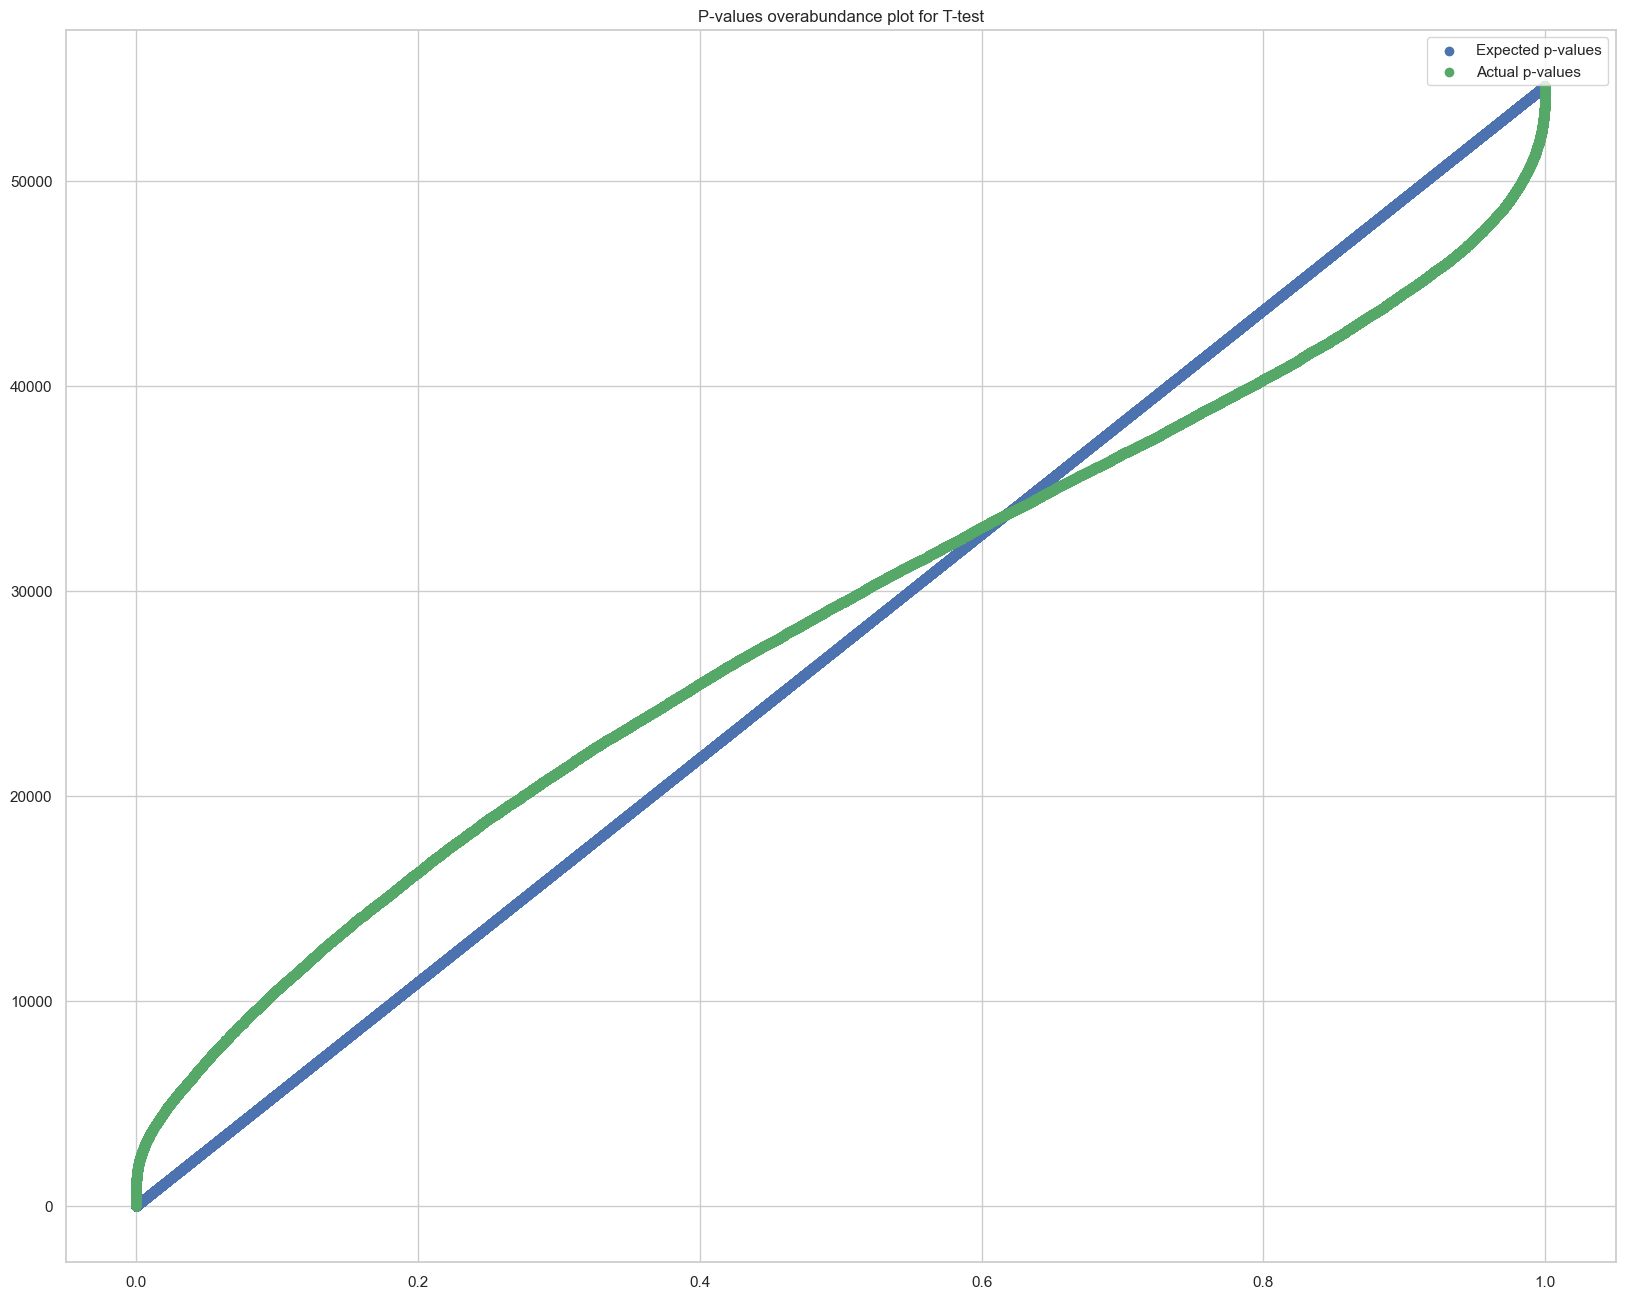

In [96]:
plt.figure(figsize = (20,16))
plt.scatter(p_values_t_greater, expected_t_p_values, label = "Expected p-values", c = 'b')
plt.scatter(p_values_t_greater, ranks_t, label = "Actual p-values", c = 'g')
plt.legend()
plt.title("P-values overabundance plot for T-test")
plt.show()

**WRS P-values we caclulated in 3.c**

In [97]:
ranks_u = pd.Series(p_values_u_greater).rank(method = 'first')

In [98]:
expected_u_p_values = len(p_values_u_greater) * (p_values_u_greater)

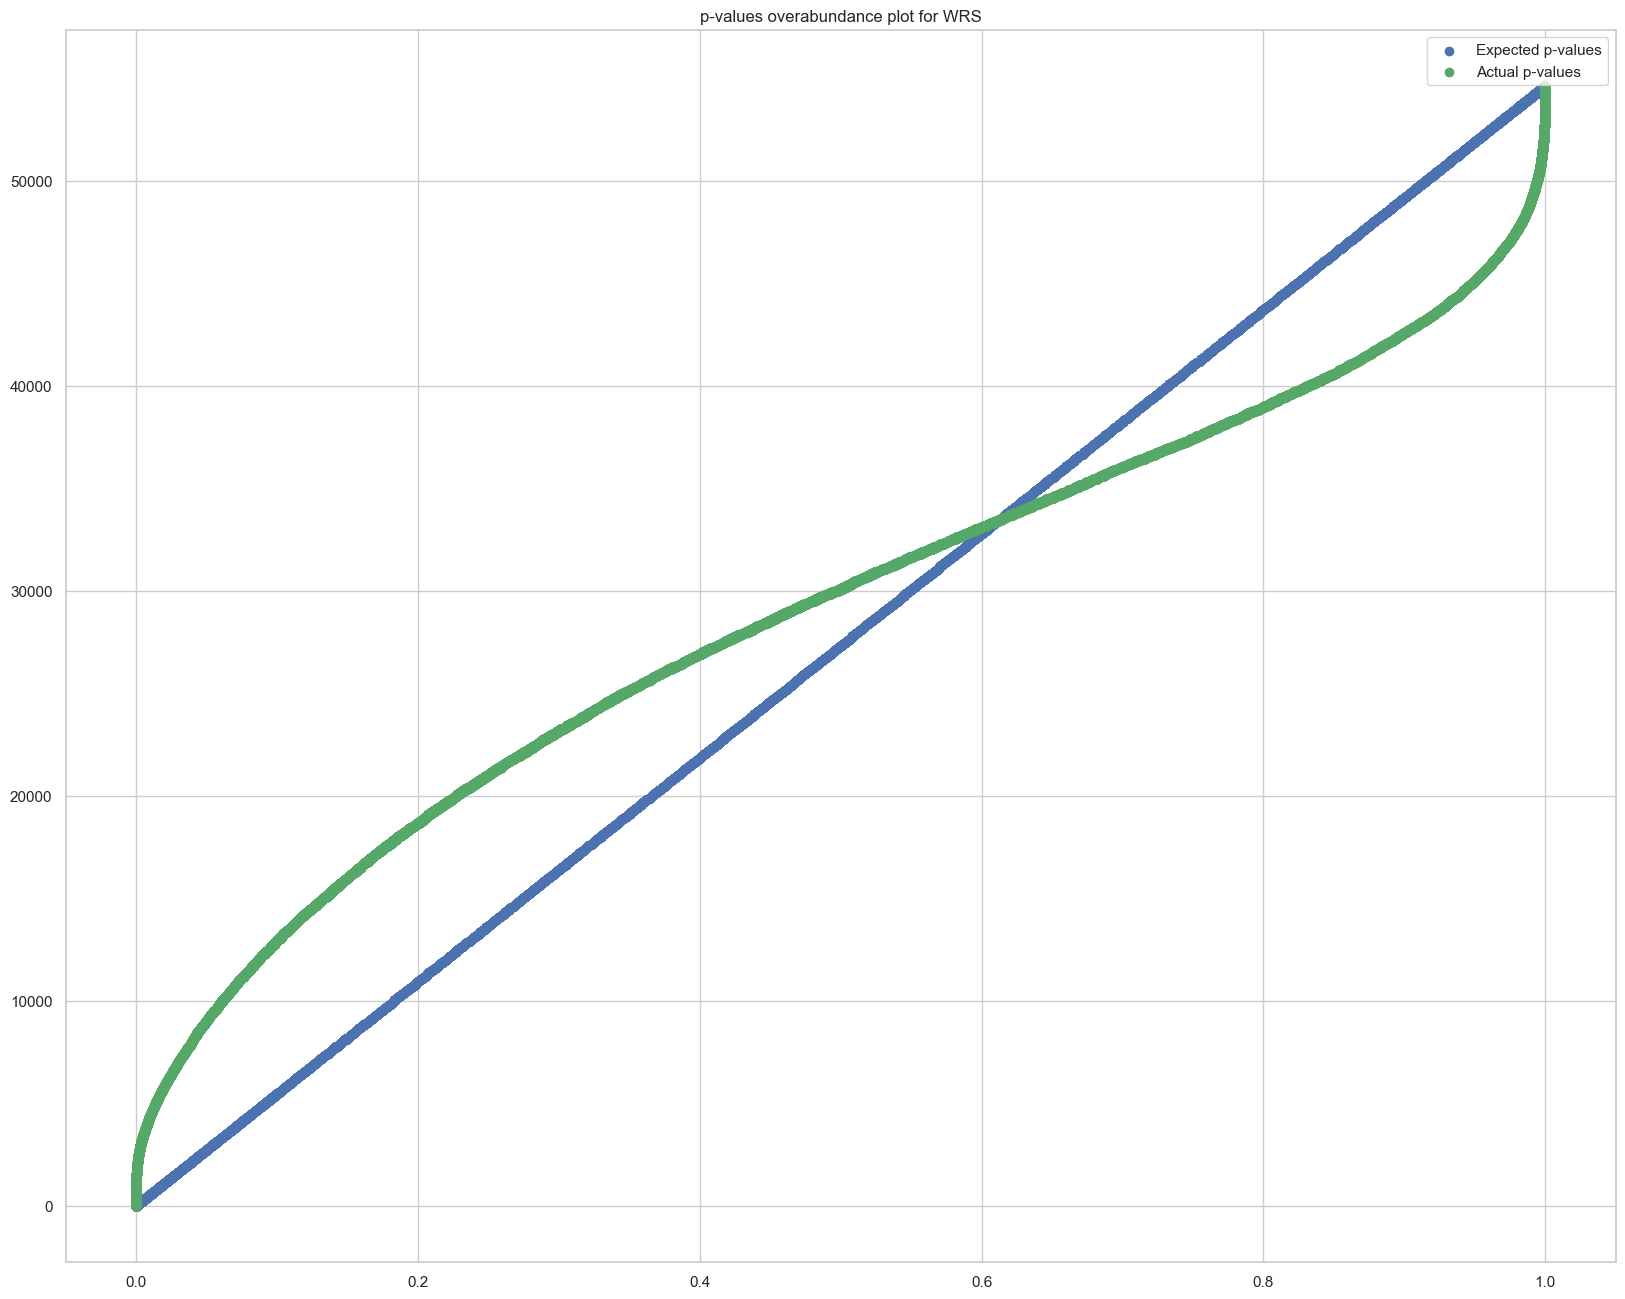

In [99]:
plt.figure(figsize = (20,16))
plt.scatter(p_values_u_greater, expected_u_p_values, label = "Expected p-values", c = 'b')
plt.scatter(p_values_u_greater, ranks_u, label = "Actual p-values", c = 'g')
plt.legend()
plt.title("p-values overabundance plot for WRS")
plt.show()

In [121]:
from statsmodels.stats.multitest import multipletests

In [101]:
print("T-test:\n")

# define the FDR thresholds
FDR_thresholds = [0.05, 0.01, 0.005]

for threshold in FDR_thresholds:
    FDR_i = (multipletests(p_values_t_greater, alpha=0.05, method='fdr_bh')[1]<=threshold).sum()
    print("number of genes for FDR threshold of " + str(threshold) + " : " + str(FDR_i))
    
print()

print("WRS-test:\n")

for threshold in FDR_thresholds:
    FDR_i = (multipletests(p_values_u_greater, alpha=0.05, method='fdr_bh')[1]<=threshold).sum()
    print("number of genes for FDR threshold of " + str(threshold) + " : " + str(FDR_i))

T-test:

number of genes for FDR threshold of 0.05 : 2104
number of genes for FDR threshold of 0.01 : 1305
number of genes for FDR threshold of 0.005 : 1104

WRS-test:

number of genes for FDR threshold of 0.05 : 2784
number of genes for FDR threshold of 0.01 : 1601
number of genes for FDR threshold of 0.005 : 1322


#### **2)	For any given gene, g, consider the following set of p-values:**

𝑝(𝜆) 𝑖𝑠 𝑎 𝑊𝑅𝑆 𝑝 − 𝑣𝑎𝑙𝑢𝑒
𝑆(𝑔) = -𝑝(𝜆)| 𝑓𝑜𝑟 𝑜𝑣𝑒𝑟𝑒𝑥𝑝𝑟𝑒𝑠𝑠𝑖𝑜𝑛 𝑖𝑛 𝑀 𝑎𝑓𝑡𝑒𝑟 𝑠𝑤𝑎𝑝𝑝𝑖𝑛𝑔 𝑜𝑛𝑒 𝑙𝑎𝑏𝑒𝑙
(In the above definition 𝜆 represents a label swap – there are 99 such swaps).

Let

𝑝𝑈(𝑔) = max 𝑆(𝑔)

In other words: 𝑝𝑈(𝑔) represents the maximum p-value that could have been obtained for g, assuming a single labeling error.

##### **2a)	For all genes, compute 𝑝𝑈(𝑔).**

We wanted to avoid 54628X99 iterations, so we only swapped the maximum value from class M and the minimum value from class H because their ranks have the most significant impact

In [129]:
def calculate_pvalue_after_swap(df_gene, idx):  
    """Calculates the p-value after swapping the 'Class' at the given index."""
    df_gene.at[idx, 'Class'] = 'H' if df_gene.at[idx, 'Class'] == 'M' else 'M'

    M_group = df_gene[df_gene['Class'] == 'M'][df_gene.columns[1]] 
    H_group = df_gene[df_gene['Class'] == 'H'][df_gene.columns[1]]

    return mannwhitneyu(M_group.astype(float), H_group.astype(float), alternative='greater')[1]

def calculate_max_pvalue(df, gene_column):
    """Calculates the maximum p-value after gene value swaps in the specified column."""
    df_gene = df[['Class', gene_column]] 

    h_min_idx = df_gene[df_gene['Class'] == 'H'][gene_column].astype(float).idxmin()
    m_max_idx = df_gene[df_gene['Class'] == 'M'][gene_column].astype(float).idxmax()

    return max(calculate_pvalue_after_swap(df_gene.copy(), h_min_idx), 
               calculate_pvalue_after_swap(df_gene.copy(), m_max_idx))

# Main calculation
pvalues = []
for gene in df.iloc[:, 2:]:
    pvalues.append(calculate_max_pvalue(df, gene))    

##### **2b)	Run the FDR procedure with threshold of 0.05 using 𝑝𝑈(𝑔)**

In [158]:
pvalues = np.array(pvalues)
ranks_u = pd.Series(pvalues).rank(method = 'first')

In [159]:
expected_u_p_values = len(pvalues) * (pvalues)

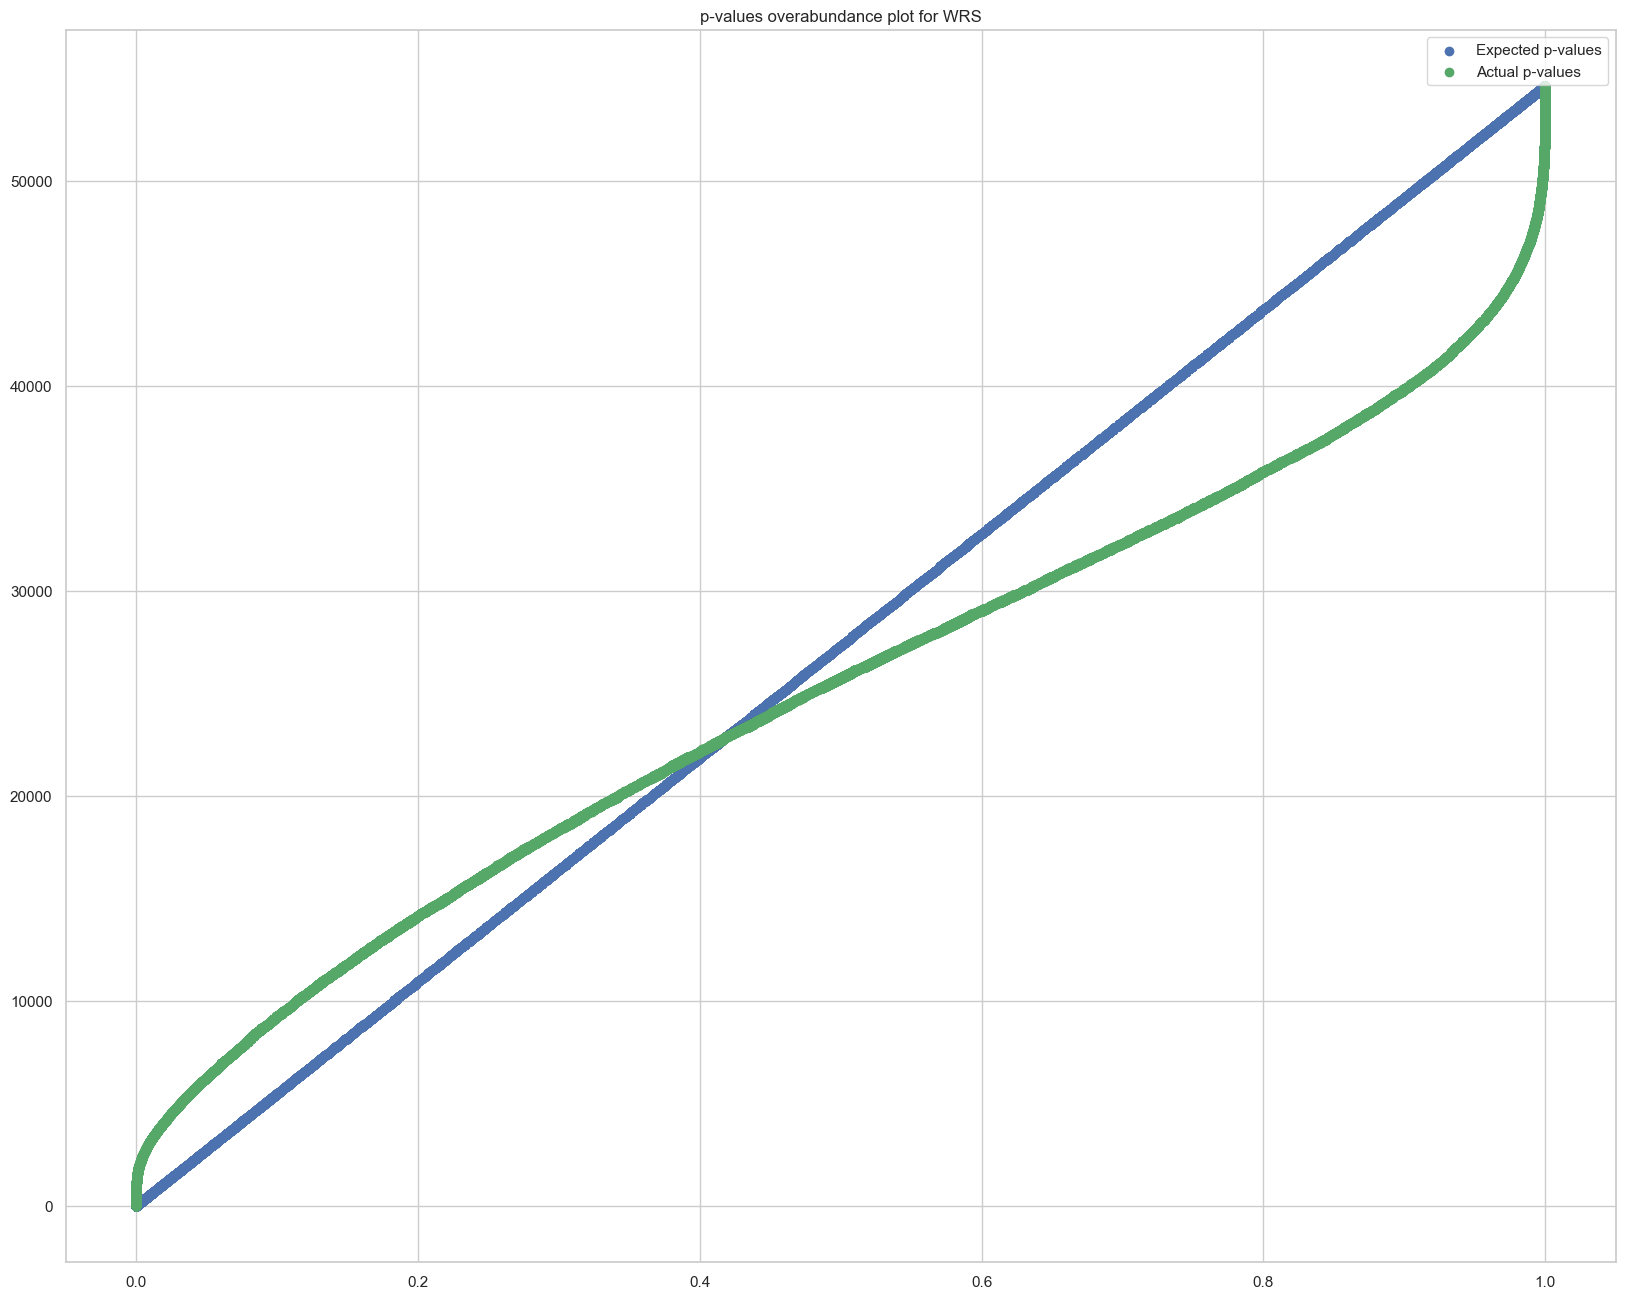

In [160]:
plt.figure(figsize = (20,16))
plt.scatter(pvalues, expected_u_p_values, label = "Expected p-values", c = 'b')
plt.scatter(pvalues, ranks_u, label = "Actual p-values", c = 'g')
plt.legend()
plt.title("p-values overabundance plot for WRS")
plt.show()

In [161]:
FDR_i = (multipletests(pvalues, alpha=0.05, method='fdr_bh')[1]<=threshold).sum()
print("number of genes for FDR threshold of " + str(threshold) + " : " + str(FDR_i))

number of genes for FDR threshold of 0.05 : 1842


##### **2c)	What is the intersection of the genes**

In [162]:
over_expressed_swaps = multipletests(pvalues, alpha=0.05, method='fdr_bh')[1]<=threshold
over_expressed_u = multipletests(p_values_u_greater, alpha=0.05, method='fdr_bh')[1]<=threshold
intersection = over_expressed_t  & over_expressed_swaps
matching_indices = np.where(intersection)[0]
print("The number of genes in the intersection is {}.".format(len(matching_indices)))

The number of genes in the intersection is 1842.


If a gene is *robustly differentially expressed* between two or more conditions, it means that there is a consistent, significant difference in the gene's expression levels across these conditions, and this difference is not likely due to random chance or experimental error.

In our case, the intersection refers to genes with a significant $p$-value for a threshold $\text{FDR} = 0.05$ in both cases, meaning they are still significant after one possible error.


##### **3)	Select any 3 differentially expressed genes, from D, and produce a graphical representation of their expression patterns that demonstrates the observed DE**

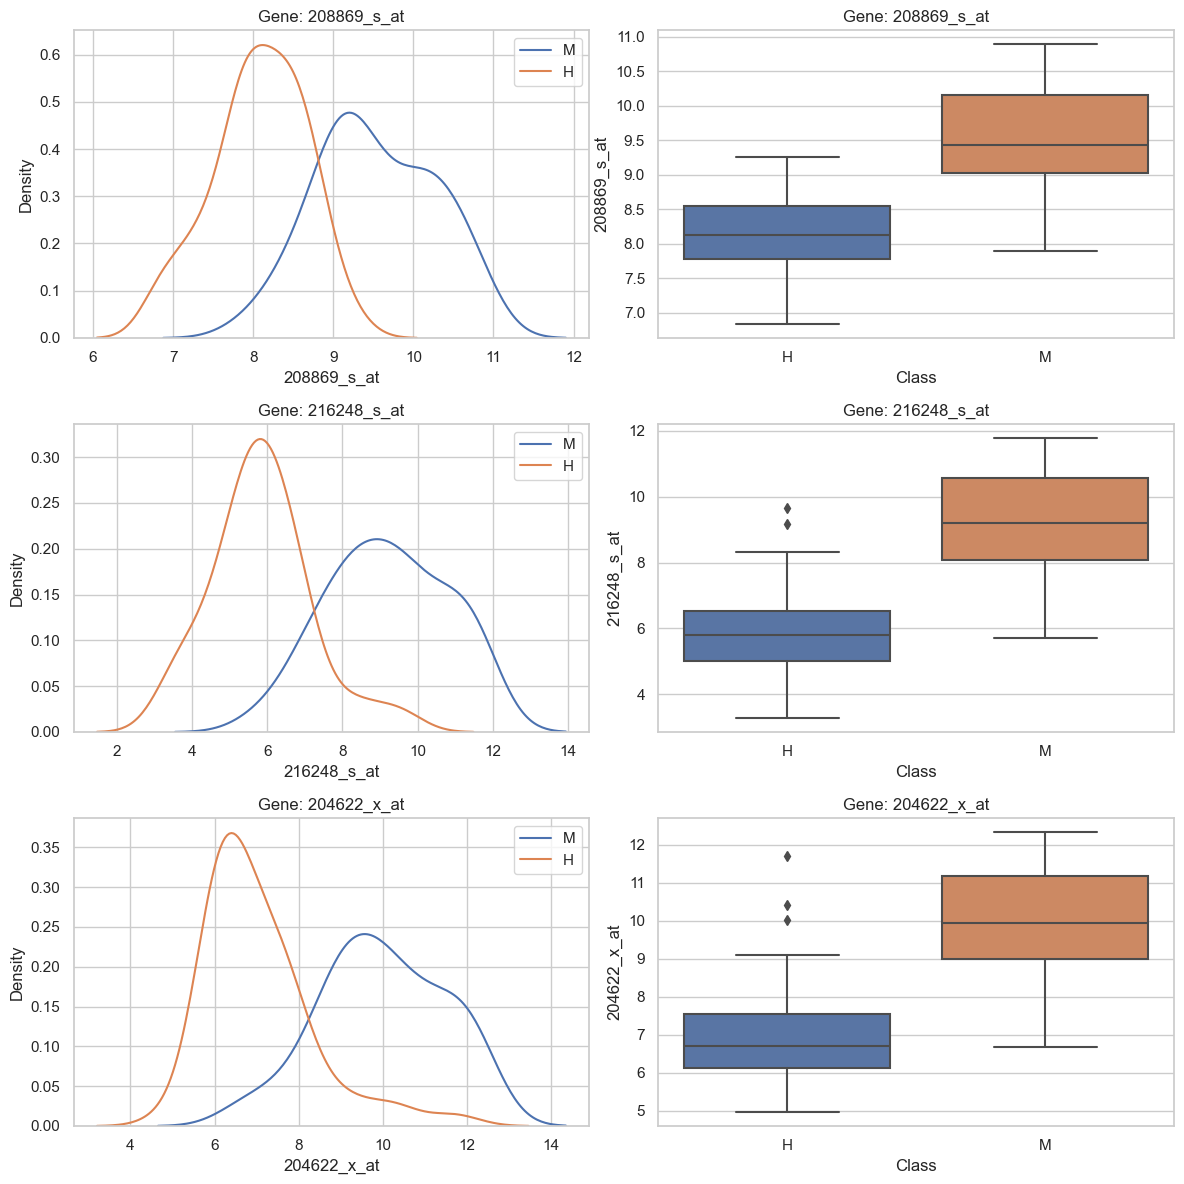

In [86]:
genes = D.iloc[:,:3].columns 

M_group_indices = df['Class'] == 'M'
H_group_indices = df['Class'] == 'H'

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i, gene in enumerate(genes):

    sns.kdeplot(data=pd.to_numeric(df[M_group_indices][gene]), ax=axes[i, 0], label='M')
    sns.kdeplot(data=pd.to_numeric(df[H_group_indices][gene]), ax=axes[i, 0], label='H')
    
    sns.boxplot(data=df[['Class', gene]], x='Class', y=gene, ax=axes[i, 1])
    
    axes[i, 0].set_title(f'Gene: {gene}')
    axes[i, 0].legend()  
    axes[i, 1].set_title(f'Gene: {gene}')

plt.tight_layout()
plt.show()

##### **4)	Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples).**

Since D is sorted by the $p$-value for each gene within each group (first the overexpressed genes and then the underexpressed genes), we only need to sort the samples by Class (first M and then H).


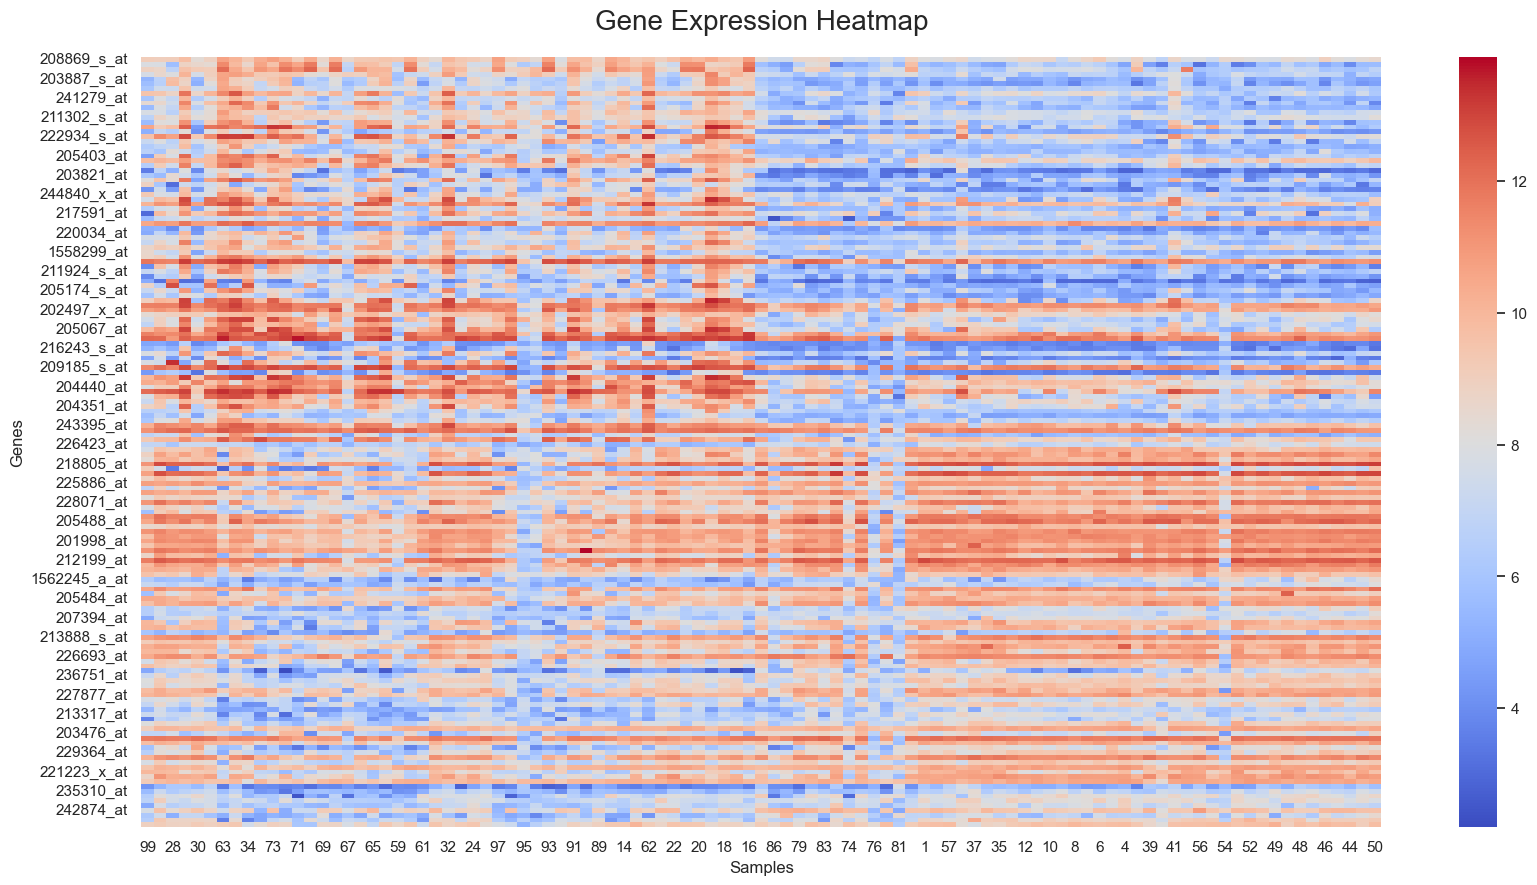

In [114]:
sorted_df_index = df.sort_values(by='Class', ascending = False).index
sorted_D = D.loc[sorted_df_index]

plt.figure(figsize=(20, 10))
sns.heatmap(sorted_D.transpose(), cmap='coolwarm')
plt.title('Gene Expression Heatmap',fontsize=20, pad = 20)
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()

Another option is to prioritize genes with the largest differences in expression between M and H. Additionally, prioritizing samples with higher overall expression, which might help identify samples with generally higher or lower activity across all genes.


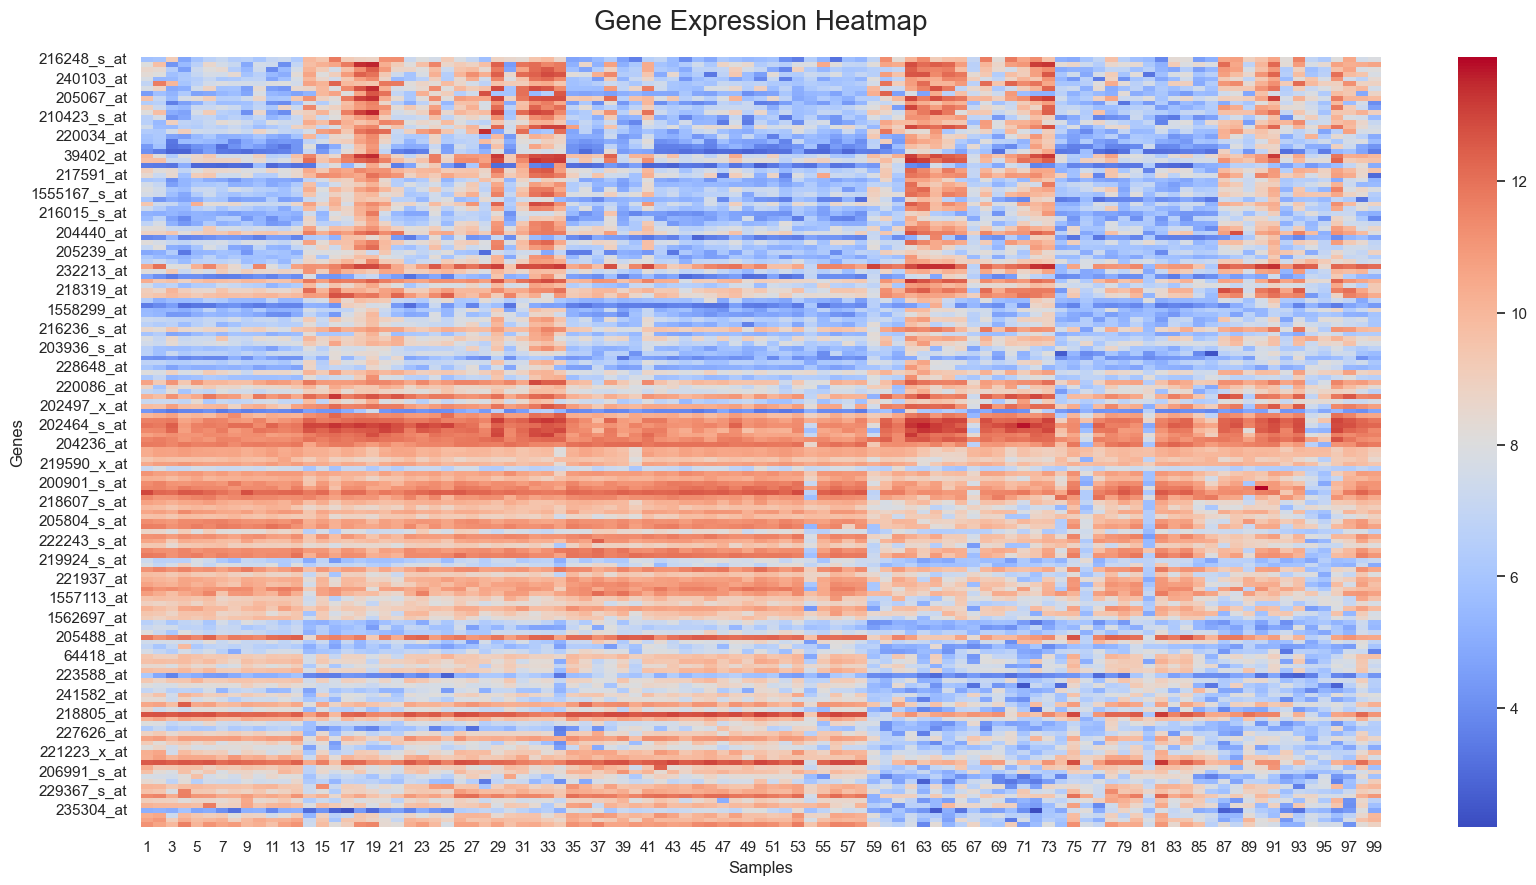

In [113]:
# Gene order based on the difference in absolute mean expressions between groups M and H
gene_order = D.apply(lambda x: np.abs(np.mean(x[M_group_indices])) - np.abs(np.mean(x[H_group_indices]))).sort_values(ascending=False).index.values

# Sample order based on mean expression levels across all genes
sample_order = D.apply(lambda x: np.mean(x)).sort_values(ascending=False).index.values

plt.figure(figsize=(20, 10))
sns.heatmap(D[sample_order][gene_order].transpose(), cmap='coolwarm')
plt.title('Gene Expression Heatmap',fontsize=20, pad = 20)
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()